In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

print(" All libraries imported successfully!")

 All libraries imported successfully!


In [2]:
# Load iris dataset from sklearn
iris = load_iris()

# Display basic information about the dataset
print("=" * 50)
print("IRIS DATASET INFORMATION")
print("=" * 50)
print(f"Feature Names: {iris.feature_names}")
print(f"Target Names: {iris.target_names}")
print(f"Data Shape: {iris.data.shape}")
print(f"Target Shape: {iris.target.shape}")

IRIS DATASET INFORMATION
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Data Shape: (150, 4)
Target Shape: (150,)


In [3]:
# Create a DataFrame for better visualization and manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

# Add target names as a separate column for readability
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  


In [4]:
# Create a DataFrame for better visualization and manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

# Add target names as a separate column for readability
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  


In [5]:
# Basic information about the dataset
print("=" * 50)
print("DATASET BASIC INFORMATION")
print("=" * 50)

print("\n Dataset Shape:")
print(f"   Rows: {df.shape[0]}")
print(f"   Columns: {df.shape[1]}")

print("\n Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print("\n Data Types:")
print(df.dtypes)

DATASET BASIC INFORMATION

 Dataset Shape:
   Rows: 150
   Columns: 6

 Column Names:
   1. sepal length (cm)
   2. sepal width (cm)
   3. petal length (cm)
   4. petal width (cm)
   5. target
   6. species

 Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object


In [6]:
# Statistical summary of the dataset
print("=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)

print("\n Descriptive Statistics:")
print(df.describe())

print("\n Additional Statistics:")
print(f"Mean of each feature:\n{df.iloc[:, :4].mean()}")

STATISTICAL SUMMARY

 Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

 Additional Statistics:
M

In [7]:
# Check for missing values
print("=" * 50)
print("MISSING VALUES CHECK")
print("=" * 50)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_df)

if df.isnull().sum().sum() == 0:
    print("\n No missing values found in the dataset!")
else:
    print(f"\n Total missing values: {df.isnull().sum().sum()}")

MISSING VALUES CHECK
                   Missing Values  Percentage (%)
sepal length (cm)               0             0.0
sepal width (cm)                0             0.0
petal length (cm)               0             0.0
petal width (cm)                0             0.0
target                          0             0.0
species                         0             0.0

 No missing values found in the dataset!


In [8]:
# Check for duplicate rows
print("=" * 50)
print("DUPLICATE VALUES CHECK")
print("=" * 50)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\n Duplicate rows:")
    print(df[df.duplicated(keep=False)])
else:
    print(" No duplicate rows found!")

DUPLICATE VALUES CHECK
Number of duplicate rows: 1

 Duplicate rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
101                5.8               2.7                5.1               1.9   
142                5.8               2.7                5.1               1.9   

     target    species  
101       2  virginica  
142       2  virginica  


TARGET VARIABLE DISTRIBUTION

 Class Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

 Class Distribution (Percentage):
species
setosa        33.33
versicolor    33.33
virginica     33.33
Name: proportion, dtype: float64


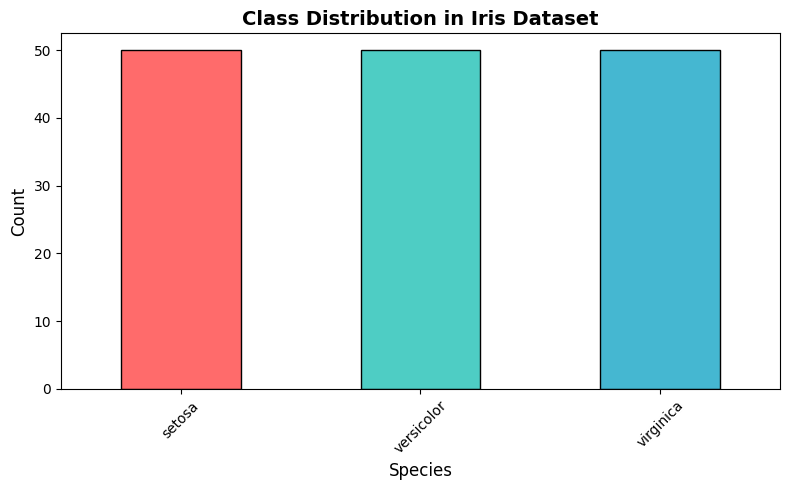


 Dataset is BALANCED (50 samples each class)


In [9]:
# Check class distribution
print("=" * 50)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 50)

class_distribution = df['species'].value_counts()
print("\n Class Distribution:")
print(class_distribution)

print("\n Class Distribution (Percentage):")
print((df['species'].value_counts(normalize=True) * 100).round(2))

# Visualize class distribution
plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
df['species'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Class Distribution in Iris Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n Dataset is BALANCED (50 samples each class)")

FEATURE DISTRIBUTIONS


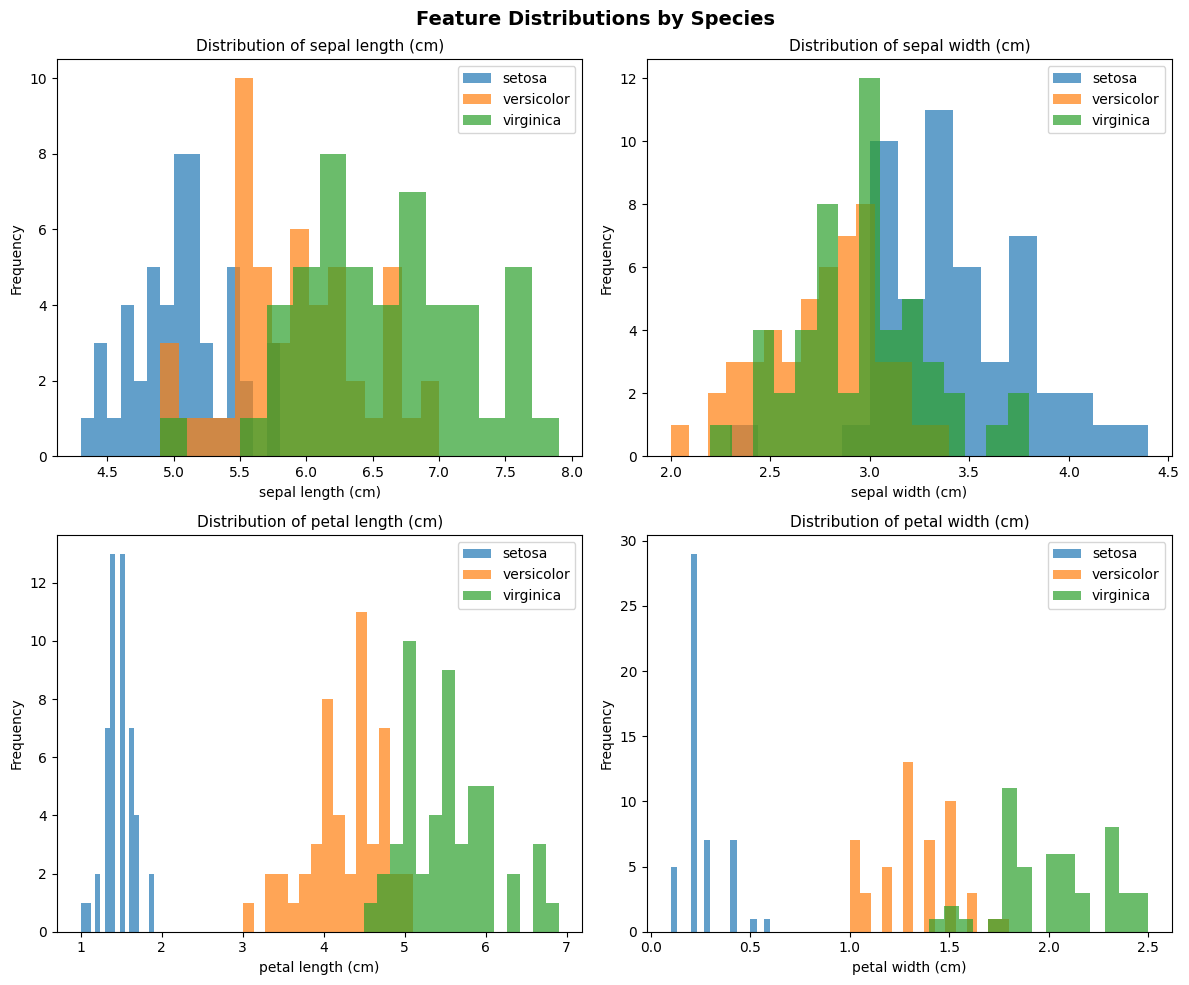

In [10]:
# Visualize feature distributions
print("=" * 50)
print("FEATURE DISTRIBUTIONS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = iris.feature_names

for idx, (ax, feature) in enumerate(zip(axes.flatten(), features)):
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        ax.hist(subset[feature], alpha=0.7, label=species, bins=15)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {feature}', fontsize=11)
    ax.legend()

plt.suptitle('Feature Distributions by Species', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

FEATURE DISTRIBUTIONS


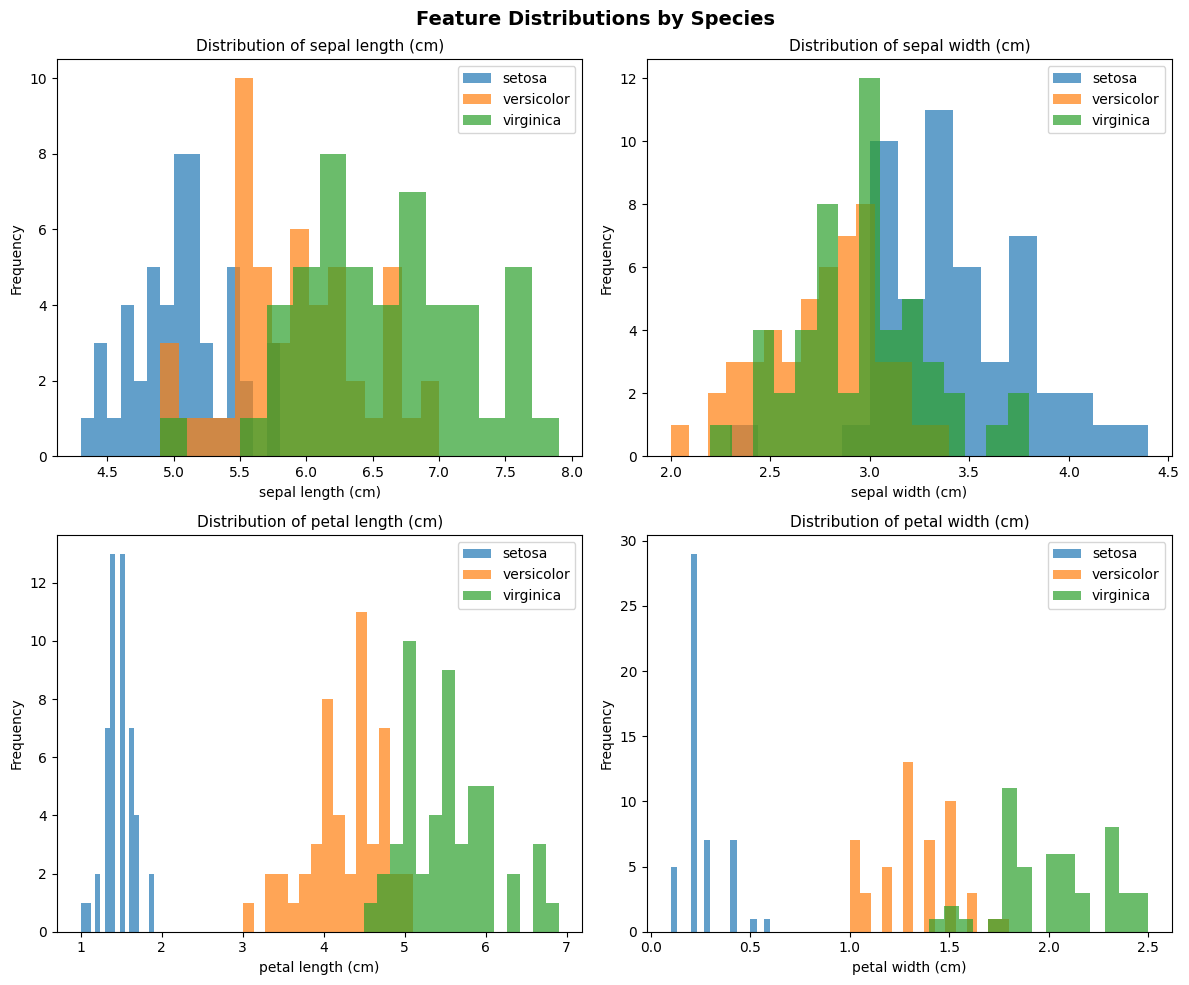

In [11]:
# Visualize feature distributions
print("=" * 50)
print("FEATURE DISTRIBUTIONS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = iris.feature_names

for idx, (ax, feature) in enumerate(zip(axes.flatten(), features)):
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        ax.hist(subset[feature], alpha=0.7, label=species, bins=15)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {feature}', fontsize=11)
    ax.legend()

plt.suptitle('Feature Distributions by Species', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

OUTLIER DETECTION - BOX PLOTS


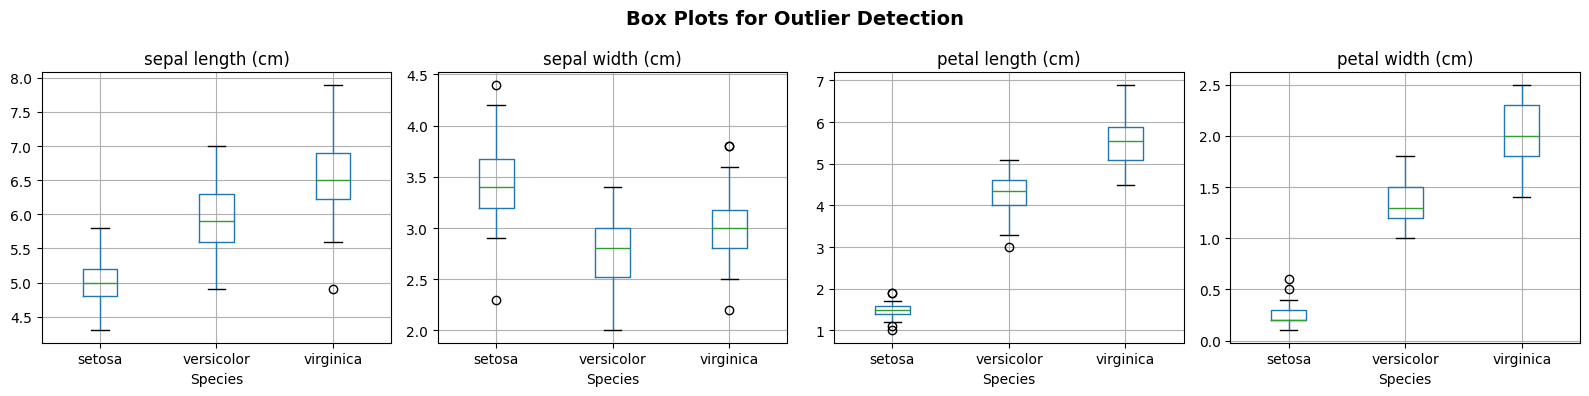


📝 Note: Some outliers may be present in sepal width


In [12]:
# Check for outliers using box plots
print("=" * 50)
print("OUTLIER DETECTION - BOX PLOTS")
print("=" * 50)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
features = iris.feature_names

for idx, (ax, feature) in enumerate(zip(axes, features)):
    df.boxplot(column=feature, by='species', ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Species')

plt.suptitle('Box Plots for Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📝 Note: Some outliers may be present in sepal width")

CORRELATION ANALYSIS

📊 Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.118              0.872   
sepal width (cm)              -0.118             1.000             -0.428   
petal length (cm)              0.872            -0.428              1.000   
petal width (cm)               0.818            -0.366              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.366  
petal length (cm)             0.963  
petal width (cm)              1.000  


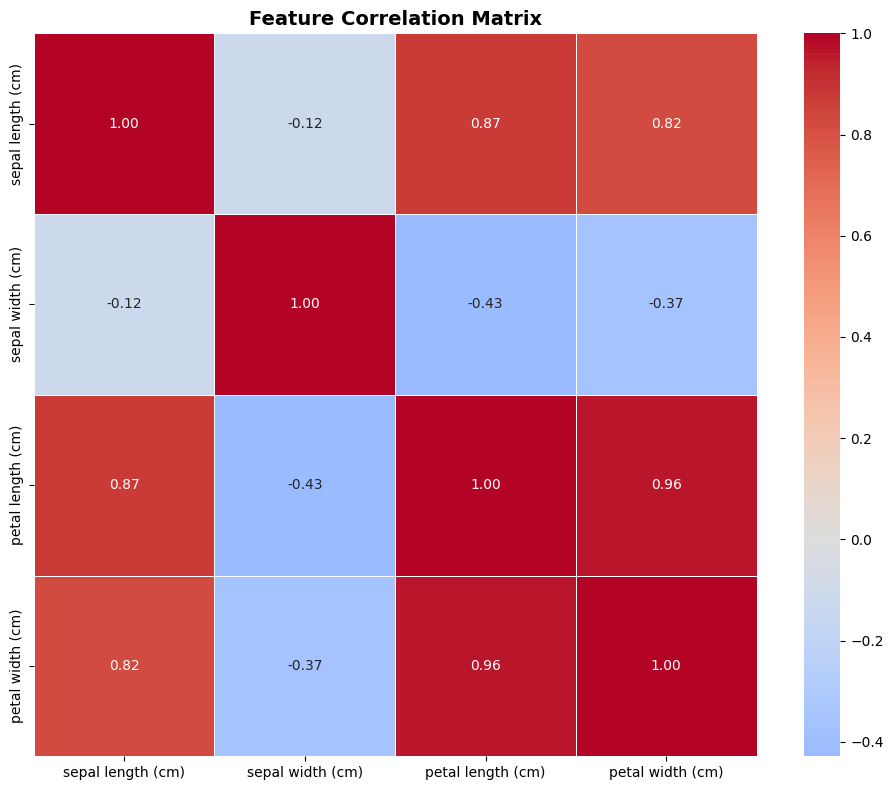

In [13]:
# Correlation analysis
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix (only for numerical features)
correlation_matrix = df[iris.feature_names].corr()

print("\n📊 Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
# STEP: Define X (features) and y (target)
print("=" * 50)
print("STEP: DEFINE X (FEATURES) AND y (TARGET)")
print("=" * 50)

# Method 1: Using DataFrame
X = df[iris.feature_names].values  # Features (4 columns)
y = df['target'].values            # Target (species as numbers)

# Alternative Method 2: Using original iris data
# X = iris.data
# y = iris.target

print("\n X (Features):")
print(f"   Shape: {X.shape}")
print(f"   Type: {type(X)}")
print(f"   Feature Names: {iris.feature_names}")

print("\n y (Target):")
print(f"   Shape: {y.shape}")
print(f"   Type: {type(y)}")
print(f"   Unique Classes: {np.unique(y)}")
print(f"   Class Names: {iris.target_names}")

print("\n X and y defined successfully!")

STEP: DEFINE X (FEATURES) AND y (TARGET)

 X (Features):
   Shape: (150, 4)
   Type: <class 'numpy.ndarray'>
   Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 y (Target):
   Shape: (150,)
   Type: <class 'numpy.ndarray'>
   Unique Classes: [0 1 2]
   Class Names: ['setosa' 'versicolor' 'virginica']

 X and y defined successfully!


In [17]:
# STEP: FEATURE SCALING (STANDARDIZATION)
print("=" * 50)
print("STEP: FEATURE SCALING (STANDARDIZATION)")
print("=" * 50)

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

print("\n BEFORE SCALING:")
print("-" * 40)
print(f"Mean of each feature:\n{X.mean(axis=0).round(3)}")
print(f"\nStd of each feature:\n{X.std(axis=0).round(3)}")
print(f"\nMin of each feature:\n{X.min(axis=0)}")
print(f"\nMax of each feature:\n{X.max(axis=0)}")

print("\n AFTER SCALING:")
print("-" * 40)
print(f"Mean of each feature:\n{X_scaled.mean(axis=0).round(10)}")  # Should be ~0
print(f"\nStd of each feature:\n{X_scaled.std(axis=0).round(3)}")    # Should be ~1
print(f"\nMin of each feature:\n{X_scaled.min(axis=0).round(3)}")
print(f"\nMax of each feature:\n{X_scaled.max(axis=0).round(3)}")

print("\n Feature scaling completed!")

STEP: FEATURE SCALING (STANDARDIZATION)

 BEFORE SCALING:
----------------------------------------
Mean of each feature:
[5.843 3.057 3.758 1.199]

Std of each feature:
[0.825 0.434 1.759 0.76 ]

Min of each feature:
[4.3 2.  1.  0.1]

Max of each feature:
[7.9 4.4 6.9 2.5]

 AFTER SCALING:
----------------------------------------
Mean of each feature:
[-0. -0. -0. -0.]

Std of each feature:
[1. 1. 1. 1.]

Min of each feature:
[-1.87  -2.434 -1.568 -1.447]

Max of each feature:
[2.492 3.091 1.786 1.712]

 Feature scaling completed!


VISUALIZATION: BEFORE AND AFTER SCALING


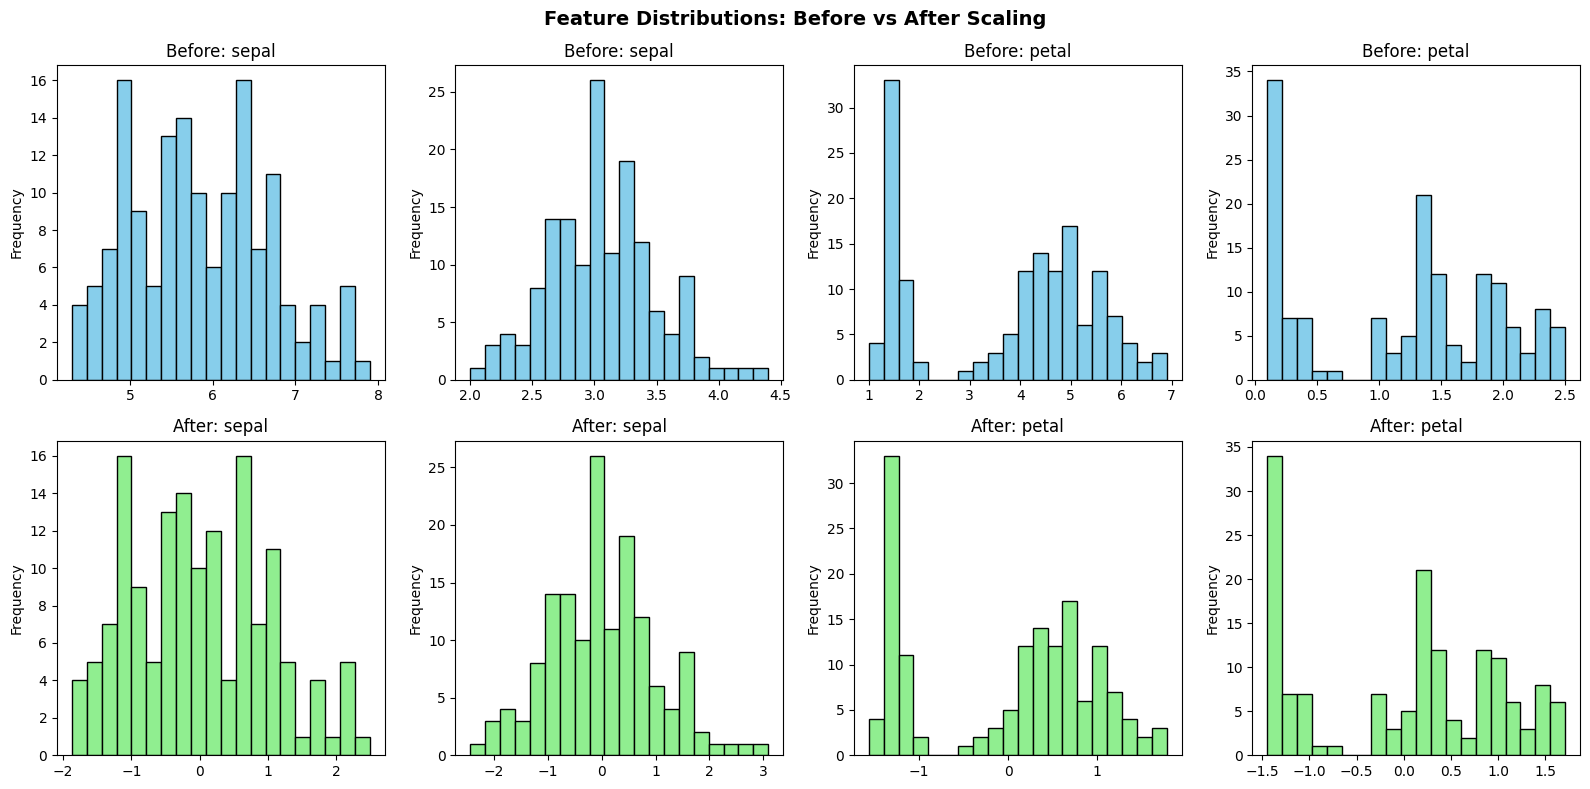

In [18]:
# Visualize before and after scaling
print("=" * 50)
print("VISUALIZATION: BEFORE AND AFTER SCALING")
print("=" * 50)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Before scaling
for idx, feature in enumerate(iris.feature_names):
    axes[0, idx].hist(X[:, idx], bins=20, color='skyblue', edgecolor='black')
    axes[0, idx].set_title(f'Before: {feature.split()[0]}')
    axes[0, idx].set_ylabel('Frequency')

# After scaling
for idx, feature in enumerate(iris.feature_names):
    axes[1, idx].hist(X_scaled[:, idx], bins=20, color='lightgreen', edgecolor='black')
    axes[1, idx].set_title(f'After: {feature.split()[0]}')
    axes[1, idx].set_ylabel('Frequency')

plt.suptitle('Feature Distributions: Before vs After Scaling', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

STEP: CHECK CLASS BALANCE

📊 Class Distribution:
----------------------------------------
   Class 0 (setosa): 50 samples (33.3%)
   Class 1 (versicolor): 50 samples (33.3%)
   Class 2 (virginica): 50 samples (33.3%)

📊 Total Samples: 150

✅ Dataset is PERFECTLY BALANCED!


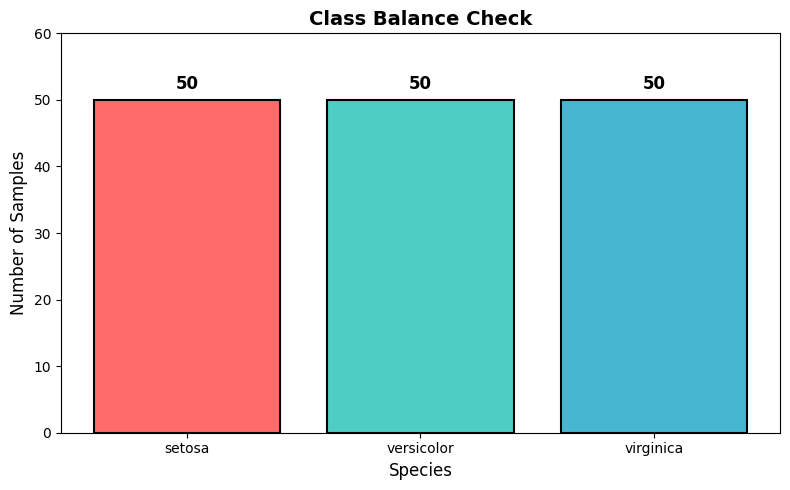

In [19]:
# STEP: CHECK CLASS BALANCE
print("=" * 50)
print("STEP: CHECK CLASS BALANCE")
print("=" * 50)

# Count samples in each class
class_counts = Counter(y)

print("\n📊 Class Distribution:")
print("-" * 40)
for class_label, count in sorted(class_counts.items()):
    class_name = iris.target_names[class_label]
    percentage = (count / len(y)) * 100
    print(f"   Class {class_label} ({class_name}): {count} samples ({percentage:.1f}%)")

print(f"\n📊 Total Samples: {len(y)}")

# Check if balanced
counts = list(class_counts.values())
if max(counts) == min(counts):
    print("\n✅ Dataset is PERFECTLY BALANCED!")
    is_balanced = True
else:
    imbalance_ratio = max(counts) / min(counts)
    print(f"\n⚠️ Dataset is IMBALANCED (ratio: {imbalance_ratio:.2f})")
    is_balanced = False

# Visualize
plt.figure(figsize=(8, 5))
bars = plt.bar(iris.target_names, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
               edgecolor='black', linewidth=1.5)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Class Balance Check', fontsize=14, fontweight='bold')

# Add count labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, max(counts) + 10)
plt.tight_layout()
plt.show()

In [20]:
# STEP: TRAIN-TEST SPLIT
print("=" * 50)
print("STEP: TRAIN-TEST SPLIT")
print("=" * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n SPLIT RESULTS:")
print("-" * 40)
print(f"Total samples: {len(X_scaled)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X_scaled)*100:.1f}%)")

print("\n SHAPES:")
print("-" * 40)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\n Train-Test split completed!")

STEP: TRAIN-TEST SPLIT

 SPLIT RESULTS:
----------------------------------------
Total samples: 150
Training samples: 120 (80.0%)
Testing samples: 30 (20.0%)

 SHAPES:
----------------------------------------
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

 Train-Test split completed!
